# **Problem dan Goals**

Berdasarkan analisis data Global Economy Indicators, berikut insights utama:

Problems:
1. Kesenjangan signifikan antar negara dalam indikator ekonomi
2. Korelasi kuat antara tata kelola (governance) dengan kinerja ekonomi
3. Beberapa negara memiliki skor sangat rendah di keamanan dan kebebasan personal

Goals:
1. Mengelompokkan negara berdasarkan karakteristik ekonomi (menggunakan K-means clustering)
2. Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap skor rata-rata ekonomi
3. Menemukan pola dan hubungan antar indikator untuk pembuatan kebijakan

Dari analisis clustering:
- Optimal cluster = 3 (berdasarkan elbow method dan silhouette score)
- Negara dapat dikelompokkan menjadi: ekonomi maju, berkembang, dan tertinggal

Temuan ini dapat membantu pembuat kebijakan untuk:
- Mengidentifikasi area prioritas perbaikan
- Merancang intervensi berdasarkan karakteristik cluster
- Menetapkan target pembangunan yang realistis



# **Dataset**
Jumlah Baris: 167

Jumlah Kolom: 14

Numerical Features (Fitur Numerik):
* AveragScore,
* SafetySecurity,
* PersonelFreedom,
* Governance, SocialCapital,
* InvestmentEnvironment,
* EnterpriseConditions,
* MarketAccessInfrastructure,
* EconomicQuality,
* LivingConditions,
* Health,
* Education,
* NaturalEnvironment

Categorical Features (Fitur Kategorikal):

*  Country






# **Codingan**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import pickle
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


In [4]:
features = ['SafetySecurity', 'PersonelFreedom', 'Governance',
           'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions',
           'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions',
           'Health', 'Education', 'NaturalEnvironment']
df = data[features]
X = df[features]

In [5]:
df.describe()

,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,67.242515,56.829401,50.360299,54.468024,53.013653,54.791677,55.019701,51.568683,69.803293,68.624910,58.723772,56.231737
std,17.542279,19.914638,17.747092,10.350639,16.743723,12.876166,15.849004,13.427811,19.752677,11.166266,19.679023,9.061262
min,16.540000,16.160000,13.090000,23.010000,21.690000,20.500000,24.230000,24.460000,19.210000,31.950000,16.780000,33.670000
25%,59.290000,39.650000,37.470000,47.820000,40.765000,45.830000,40.055000,41.295000,55.830000,60.595000,44.355000,50.265000
50%,68.930000,57.170000,47.510000,54.390000,51.250000,53.520000,56.590000,50.060000,74.770000,71.380000,61.930000,55.540000
75%,80.560000,72.865000,60.965000,60.610000,64.640000,62.760000,69.060000,62.555000,86.975000,77.340000,74.130000,61.940000
max,96.320000,94.100000,90.410000,82.560000,84.990000,83.840000,85.750000,80.100000,95.860000,86.890000,91.440000,78.740000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SafetySecurity              167 non-null    float64
 1   PersonelFreedom             167 non-null    float64
 2   Governance                  167 non-null    float64
 3   SocialCapital               167 non-null    float64
 4   InvestmentEnvironment       167 non-null    float64
 5   EnterpriseConditions        167 non-null    float64
 6   MarketAccessInfrastructure  167 non-null    float64
 7   EconomicQuality             167 non-null    float64
 8   LivingConditions            167 non-null    float64
 9   Health                      167 non-null    float64
 10  Education                   167 non-null    float64
 11  NaturalEnvironment          167 non-null    float64
dtypes: float64(12)
memory usage: 15.8 KB


In [7]:
df.isnull().sum()

,0
SafetySecurity,0
PersonelFreedom,0
Governance,0
SocialCapital,0
InvestmentEnvironment,0
EnterpriseConditions,0
MarketAccessInfrastructure,0
EconomicQuality,0
LivingConditions,0
Health,0


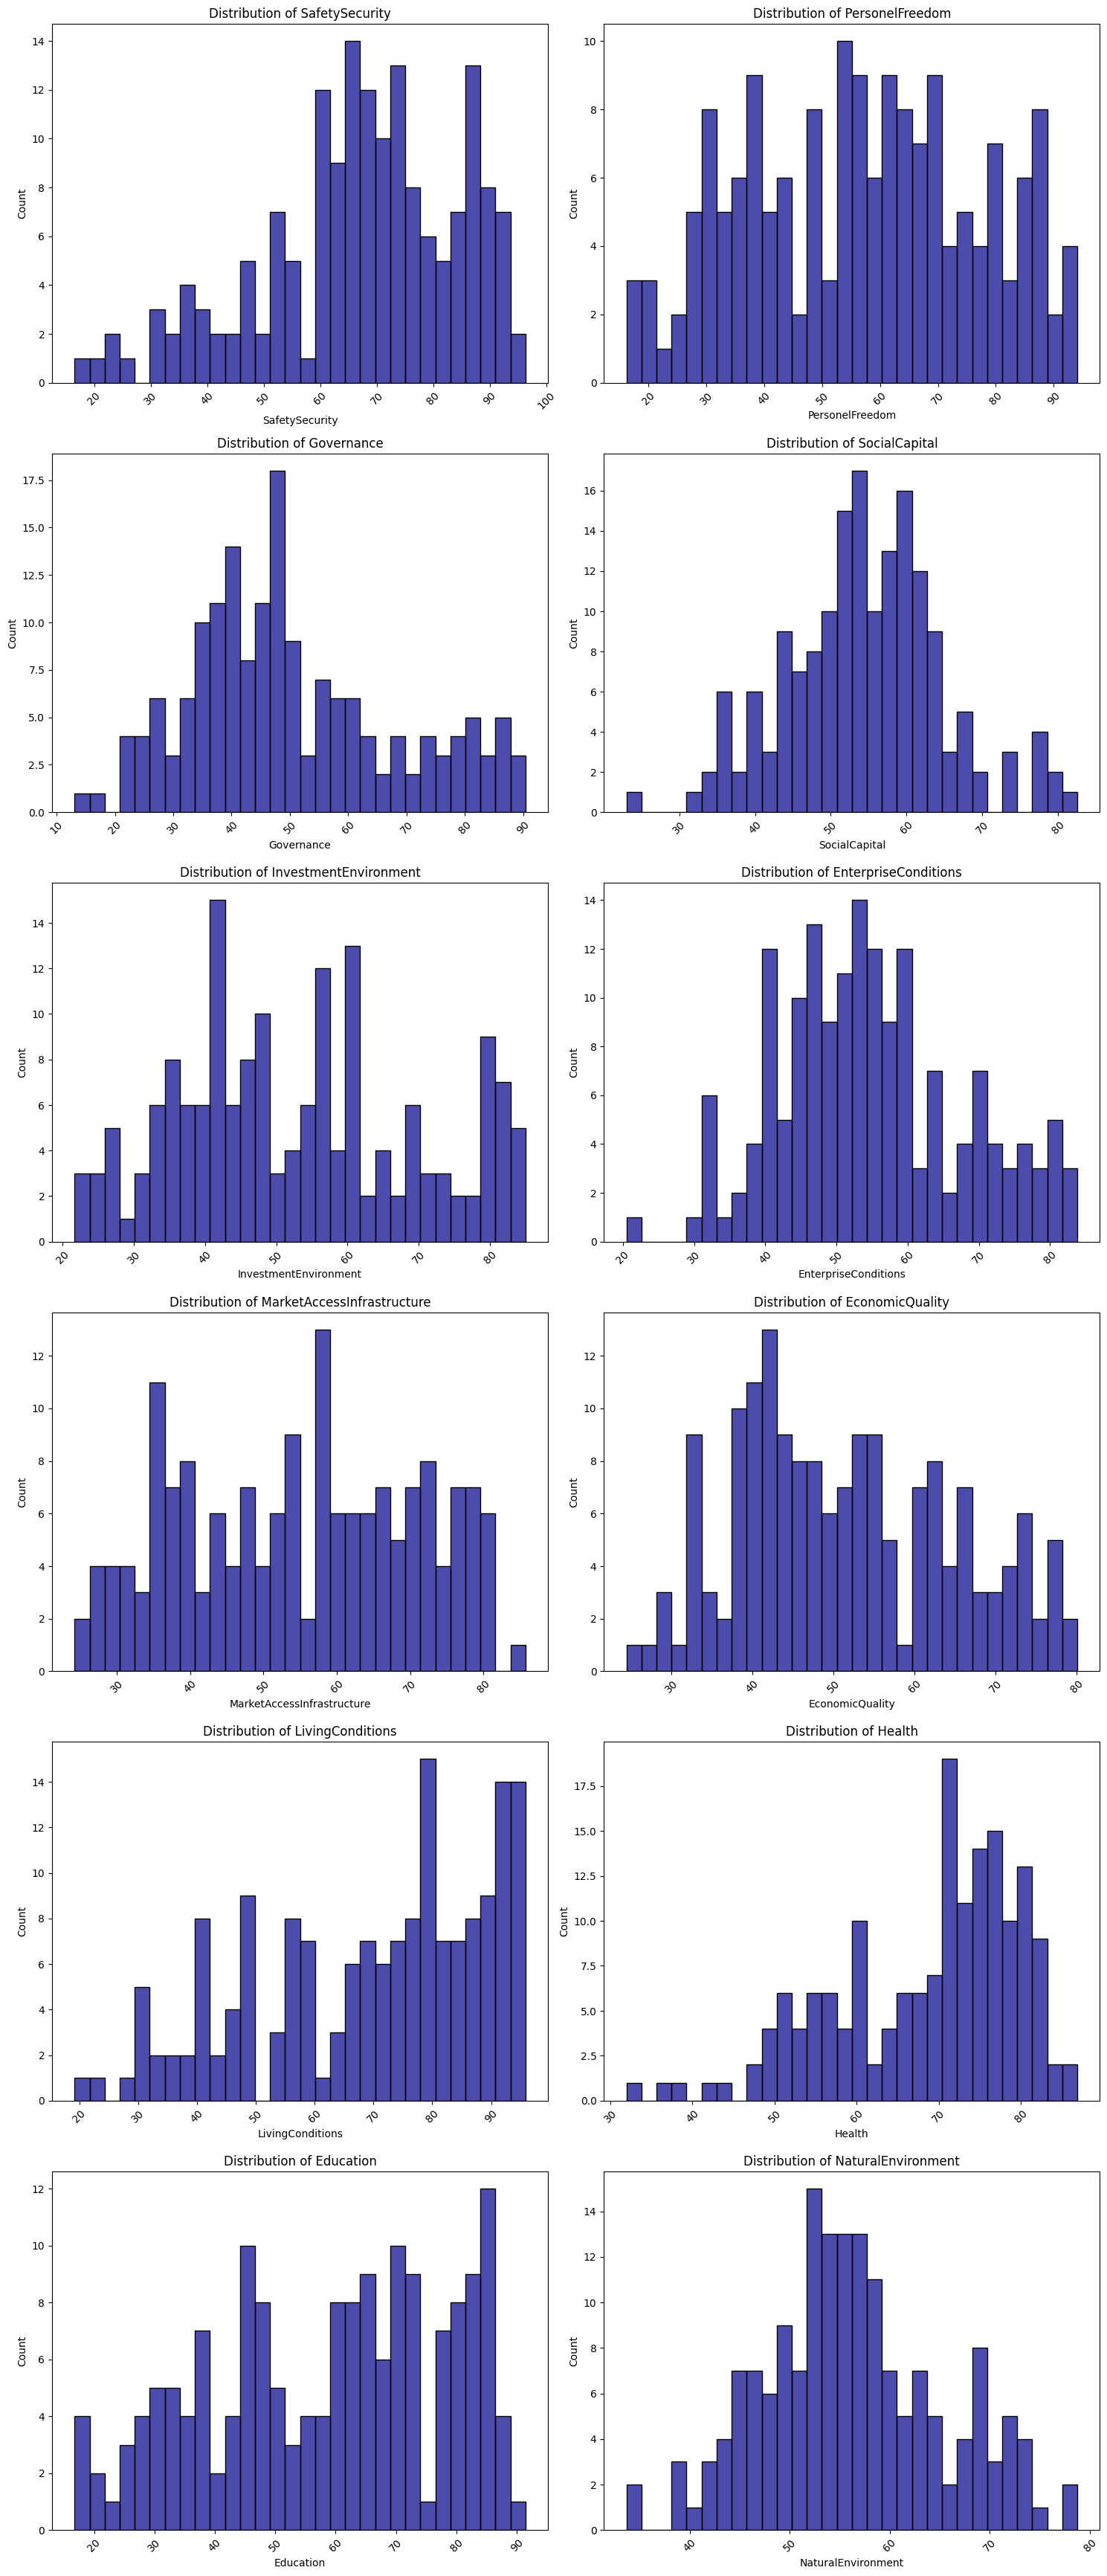

In [8]:
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 40))

# Create subplots for each column
for idx, column in enumerate(df.columns[0:], 1): # Skip Country column
   plt.subplot(7, 2, idx)
   sns.histplot(data=df, x=column, bins=30, color='darkblue', alpha=0.7)
   plt.title(f'Distribution of {column}')
   plt.xlabel(column)
   plt.ylabel('Count')
   plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

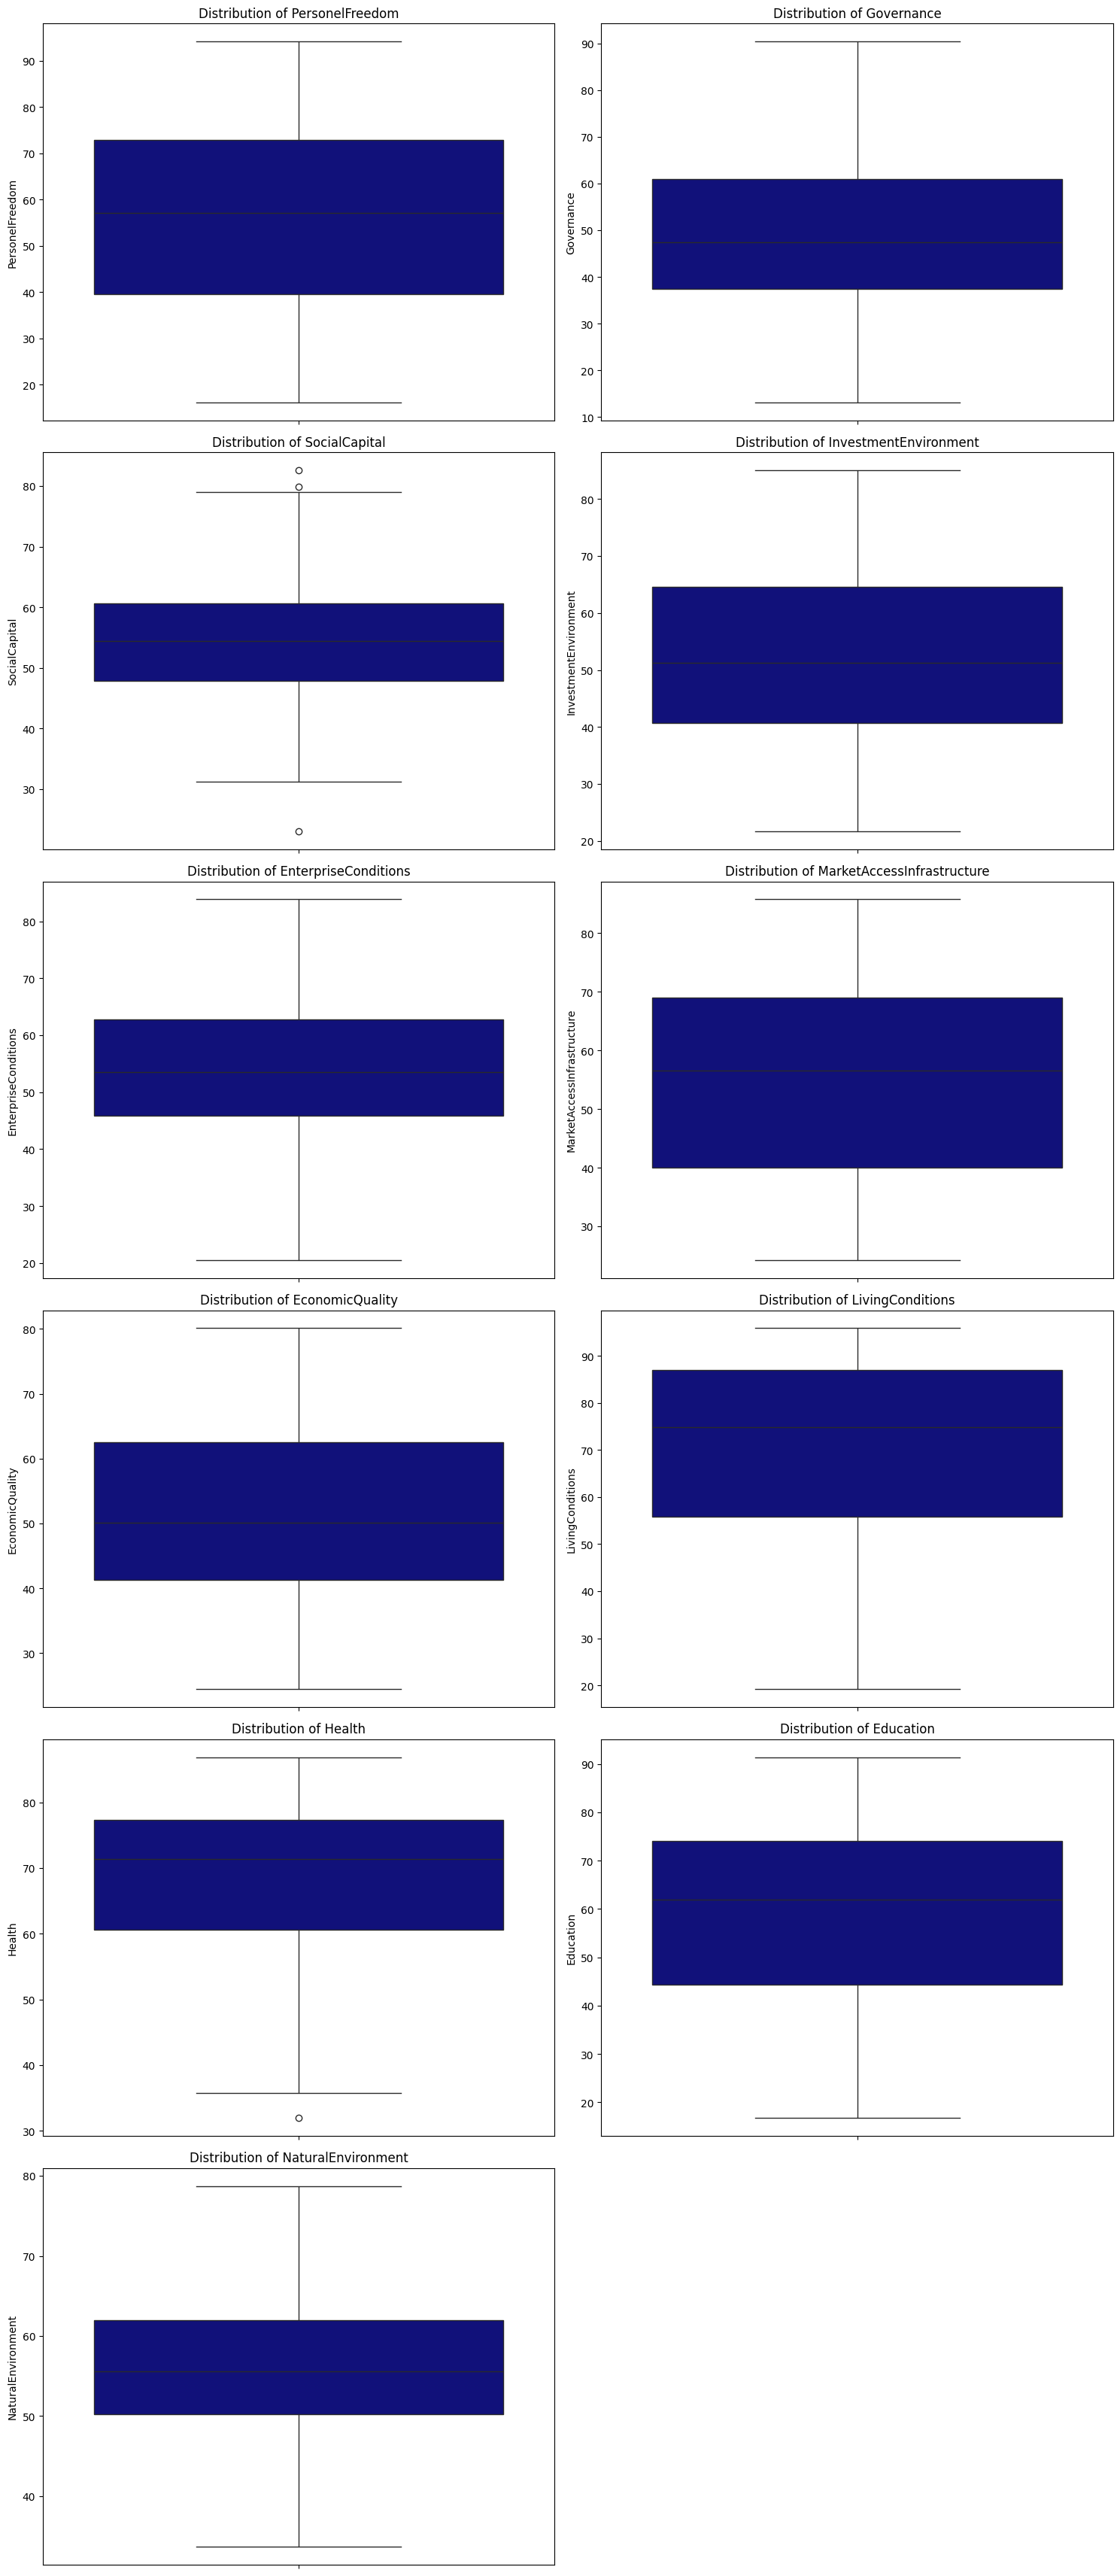

In [9]:

# Create subplot for all numerical columns
plt.figure(figsize=(15, 40))

# Plot boxplots
for idx, column in enumerate(df.columns[1:], 1): # Skip Country column
   plt.subplot(7, 2, idx)
   sns.boxplot(data=df, y=column, color='darkblue')
   plt.title(f'Distribution of {column}')
   plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

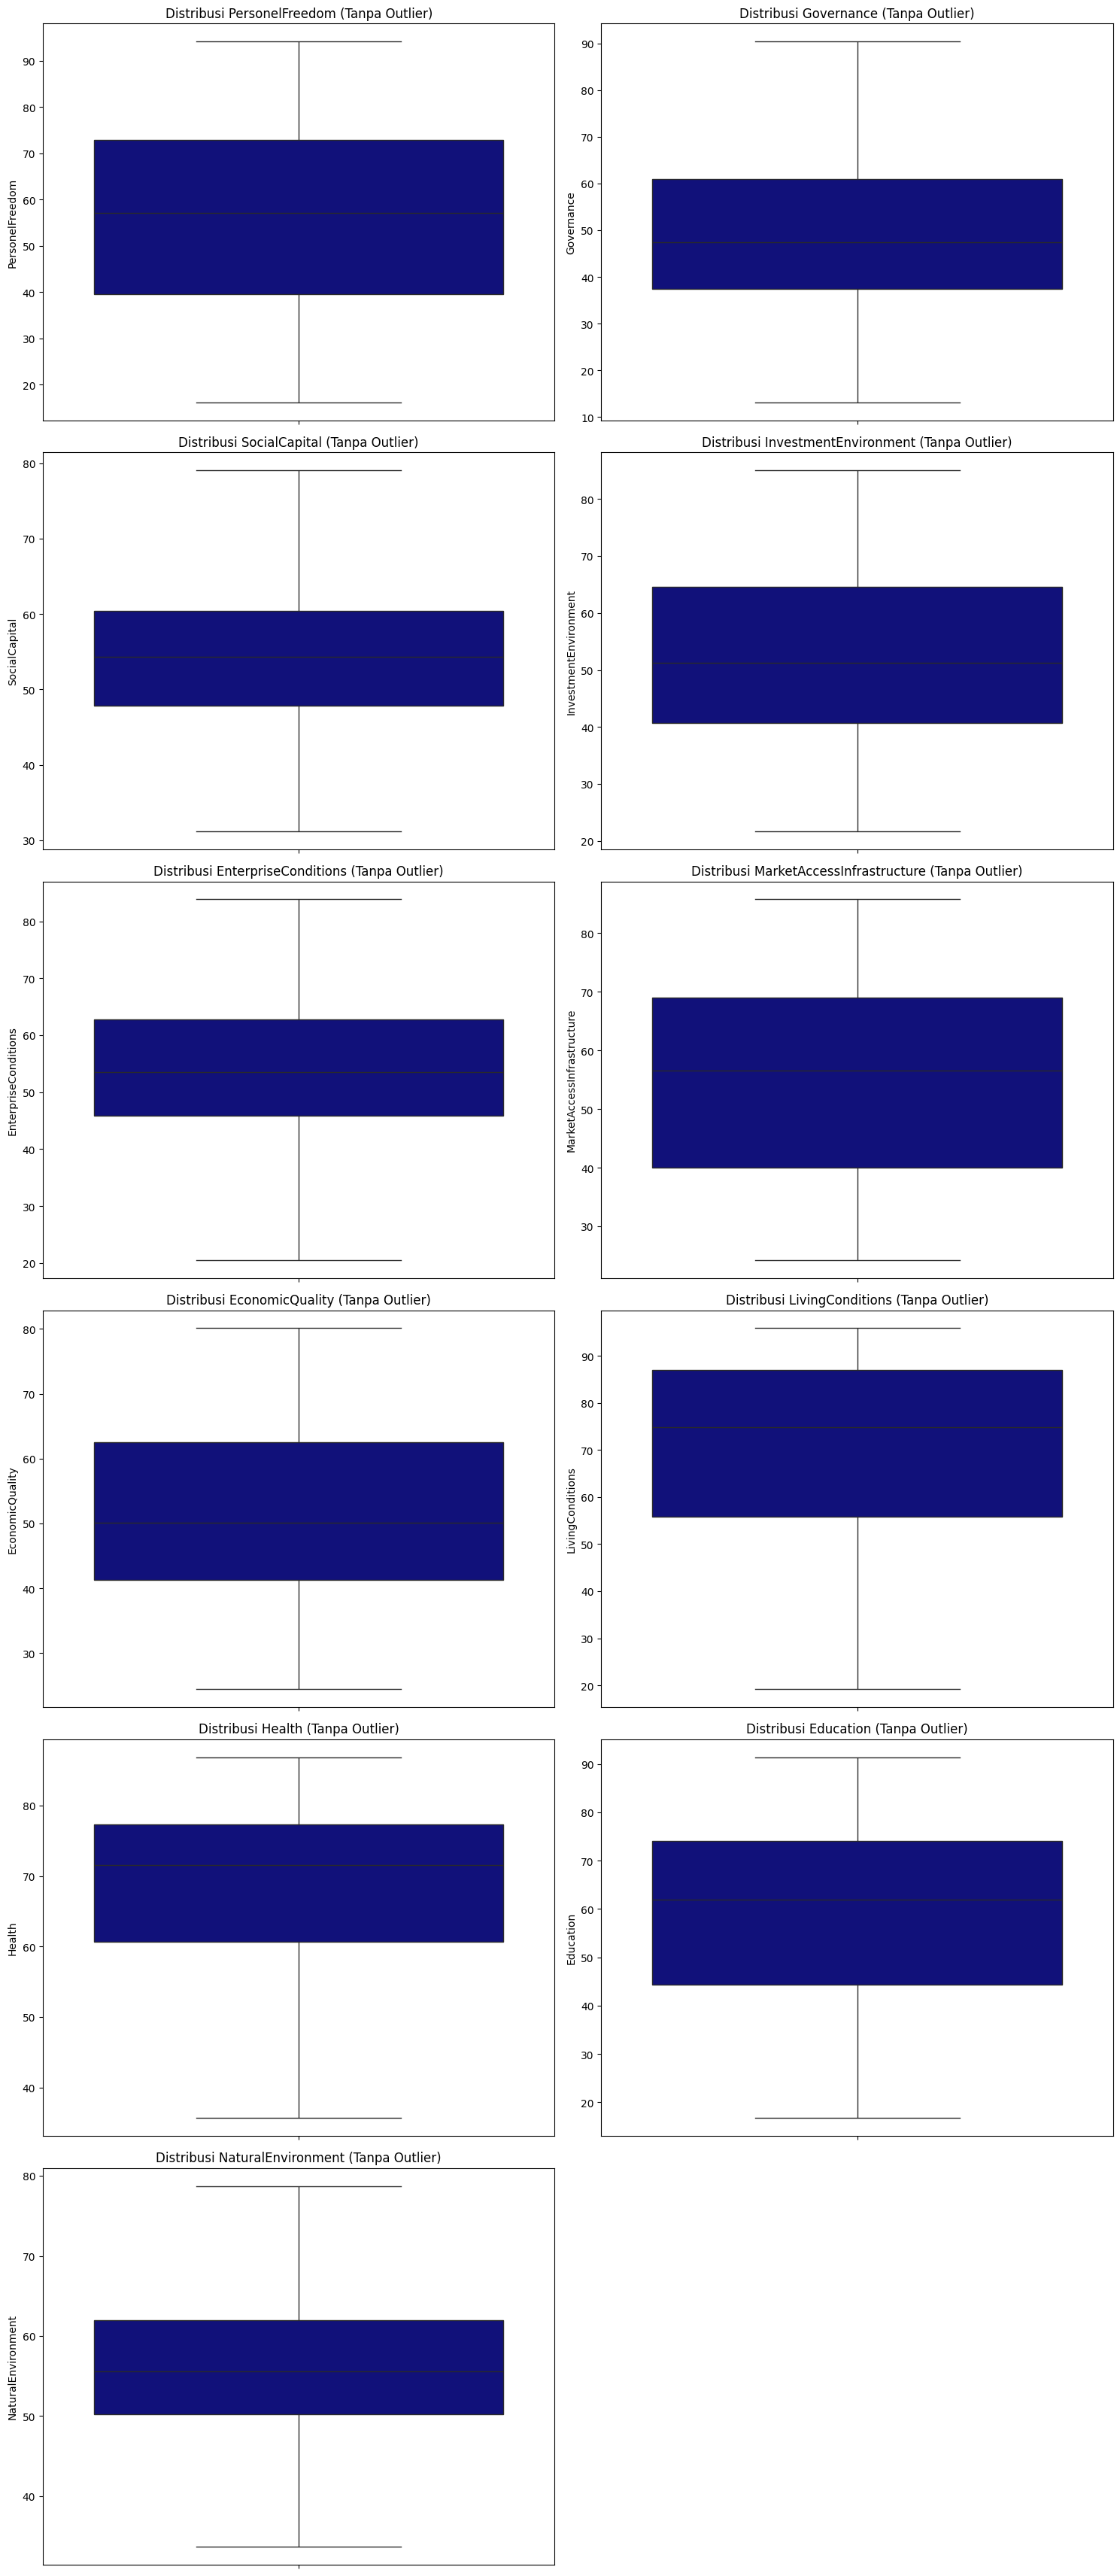

In [10]:
plt.figure(figsize=(15, 40))

# Loop melalui setiap fitur numerik
for idx, column in enumerate(df.columns[1:], 1):  # Lewati kolom 'Country'
    # Buat subplot untuk setiap fitur
    plt.subplot(7, 2, idx)

    # Hitung batas atas dan bawah untuk mendeteksi outlier
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data untuk menghapus outlier
    filtered_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Buat box plot tanpa outlier
    sns.boxplot(data=filtered_data, y=column, color='darkblue', showfliers=False)
    plt.title(f'Distribusi {column} (Tanpa Outlier)')
    plt.xticks(rotation=45)

# Atur layout dan tampilkan plot
plt.tight_layout()
plt.show()

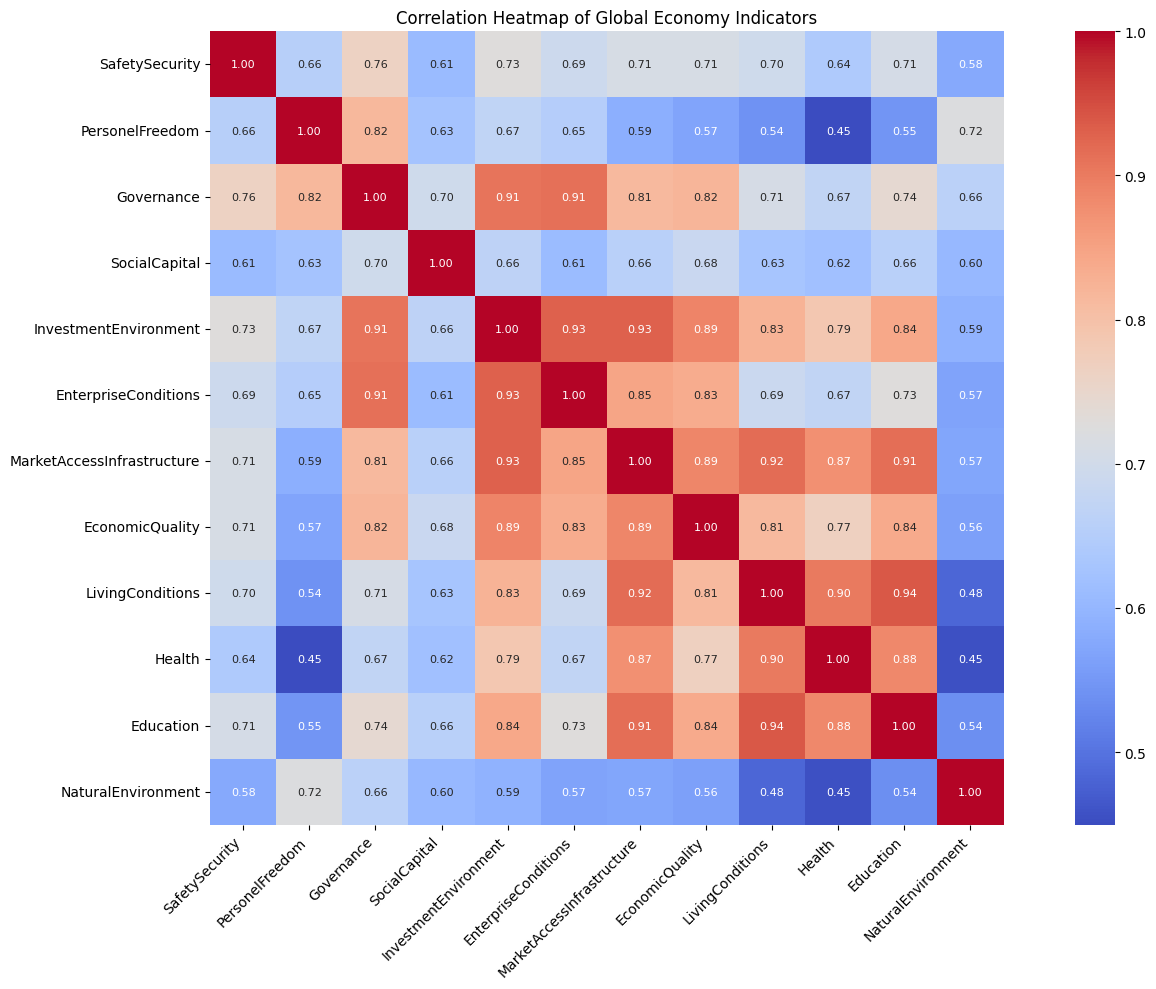

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.iloc[:, 0:].corr(),
           annot=True,
           cmap='coolwarm',
           fmt='.2f',
           square=True,
           annot_kws={'size': 8})

plt.title('Correlation Heatmap of Global Economy Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

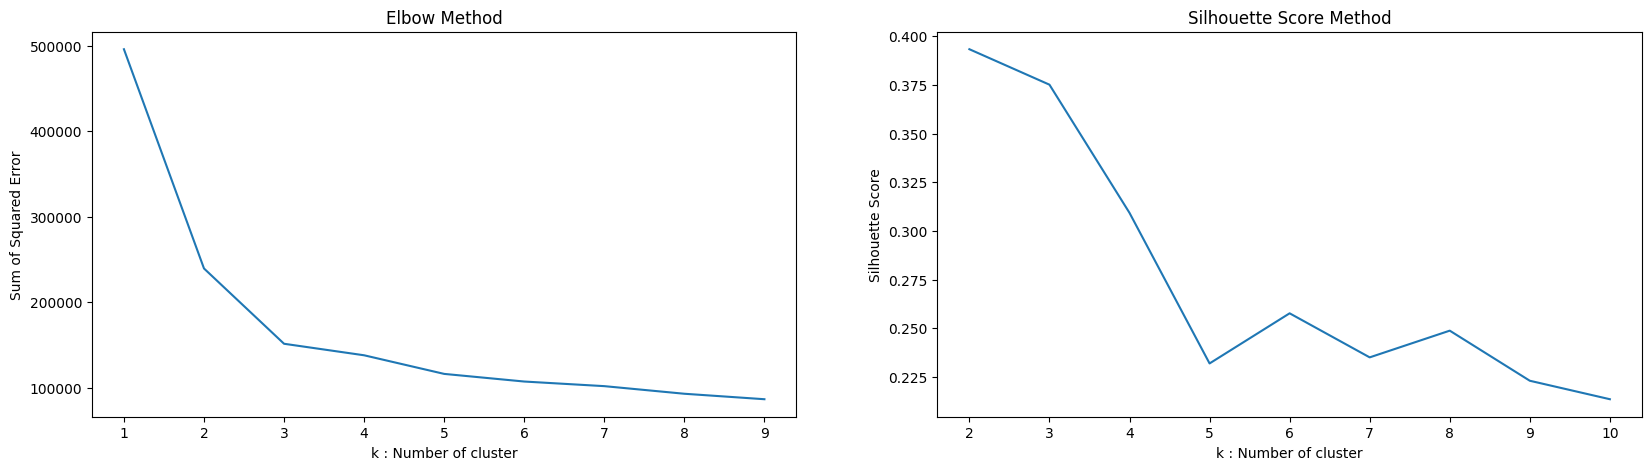

In [11]:
from sklearn.metrics.cluster import silhouette_score
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(df)
    labels = kmeans.labels_
    sil.append(silhouette_score(df, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

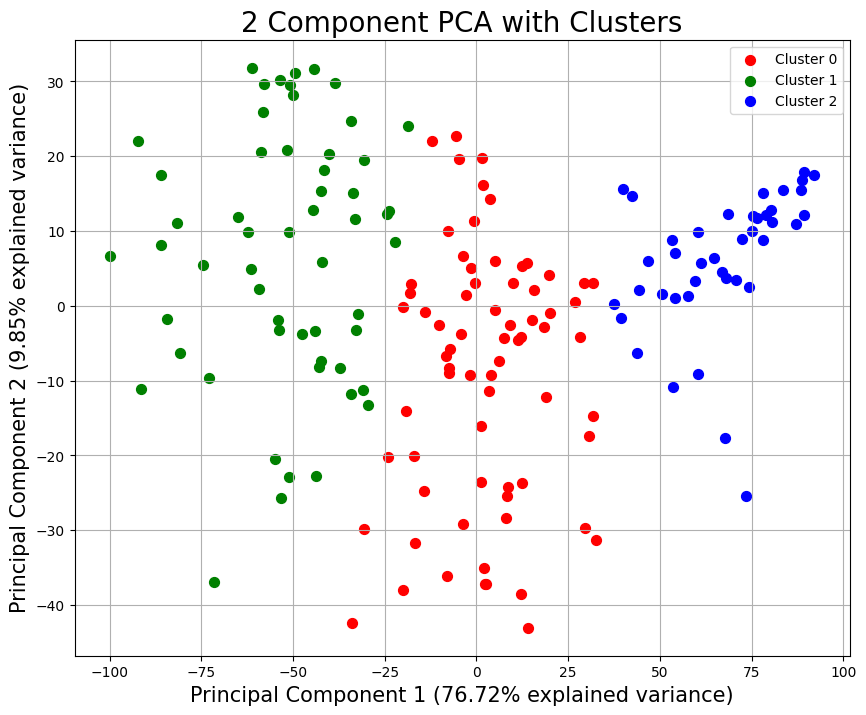

In [12]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1', 'principal component 2'])


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

finalDf = pd.concat([principalDf, pd.Series(cluster_labels, name='Cluster')], axis=1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA with Clusters', fontsize=20)

# Define targets and colors for each cluster
targets = [0, 1, 2]  # Cluster labels
colors = ['r', 'g', 'b']  # Colors for each cluster

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
              finalDf.loc[indicesToKeep, 'principal component 2'],
              c=color,
              s=50,
              label=f'Cluster {target}')

ax.legend()
ax.grid()
explained_var = pca.explained_variance_ratio_
plt.xlabel(f'Principal Component 1 ({explained_var[0]:.2%} explained variance)')
plt.ylabel(f'Principal Component 2 ({explained_var[1]:.2%} explained variance)')

plt.grid(True)
plt.show()

PC1 mungkin merepresentasikan "Kekuatan Ekonomi & Infrastruktur" karena memiliki bobot tinggi pada indikator ekonomi

PC2 mungkin merepresentasikan "Kualitas Hidup & Sosial" karena berkaitan dengan kesehatan, pendidikan, dan kebebasan personal

Cluster 0 (Merah): Terletak di tengah grafik, menunjukkan negara-negara dengan karakteristik ekonomi menengah

Cluster 1 (Hijau): Berada di sebelah kiri grafik, kemungkinan merepresentasikan negara-negara dengan tantangan ekonomi yang lebih besar

Cluster 2 (Biru): Terletak di sebelah kanan grafik, mungkin menunjukkan negara-negara dengan ekonomi yang lebih majupengembangan

In [13]:
feature_weights = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("\nKontribusi Fitur to principal components:")
print(feature_weights)

# Calculate total explained variance
total_var = sum(explained_var)
print(f"\nTotal explained variance: {total_var:.2%}")


Kontribusi Fitur to principal components:
                                 PC1       PC2
SafetySecurity              0.303253  0.145881
PersonelFreedom             0.314171  0.687426
Governance                  0.341139  0.286297
SocialCapital               0.161509  0.073394
InvestmentEnvironment       0.332258 -0.015425
EnterpriseConditions        0.236961  0.080690
MarketAccessInfrastructure  0.313744 -0.198092
EconomicQuality             0.253776 -0.094548
LivingConditions            0.373525 -0.383457
Health                      0.198136 -0.239559
Education                   0.377674 -0.348467
NaturalEnvironment          0.126783  0.195001

Total explained variance: 86.57%


Meskipun tampak kontradiktif, negara dengan tantangan ekonomi besar mungkin memiliki skor PC2 yang tinggi karena beberapa faktor, termasuk kombinasi skor pada berbagai fitur, variasi internal cluster,kompleksitas data, dan interpretasi PC2 yang lebih luas. Penting untuk diingat bahwa PCA dan clustering adalah alat penyederhanaan data, dan interpretasi hasil harus dilakukan dengan hati-hati dan mempertimbangkan konteks data yang dianalisis.

In [18]:
# Dilakukan data drop dan dipilih Feature terbaik berdasarkan PCA (Principal Components Analysis)

# Pemilihan Fitur
important_features = ['SafetySecurity', 'Governance', 'EconomicQuality', 'LivingConditions','NaturalEnvironment']
dfinal = data[important_features]
XF = dfinal[important_features]

# Standarisasi/Scaling pada data yang telah dipilih fiturnya
X_scaled = StandardScaler().fit_transform(XF) # Scaling pada XF, bukan X lagi
scaler = StandardScaler()
scaler.fit(XF)

StandardScaler()

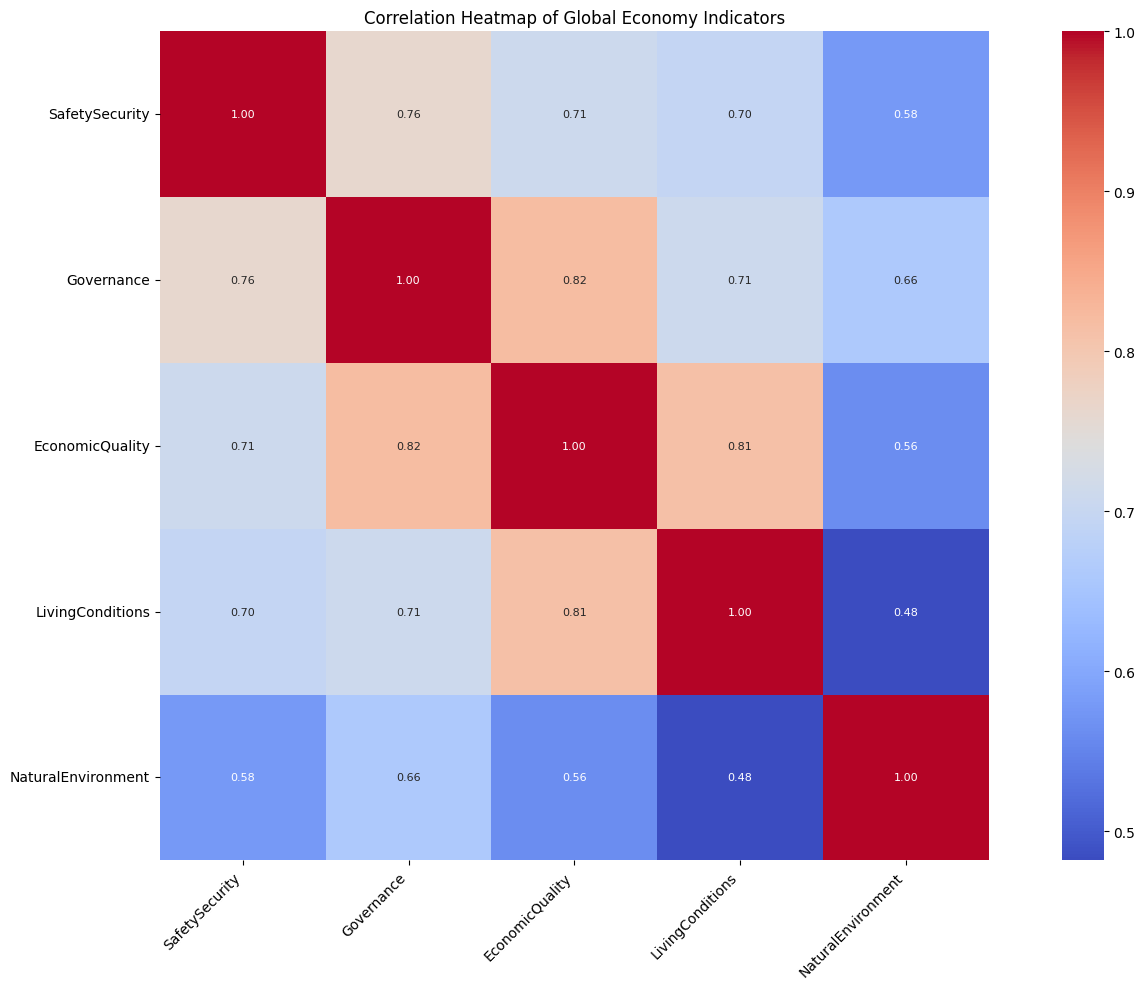

In [21]:
# Create correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(XF.iloc[:, 0:].corr(),
           annot=True,
           cmap='coolwarm',
           fmt='.2f',
           square=True,
           annot_kws={'size': 8})

plt.title('Correlation Heatmap of Global Economy Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [20]:
# Saat melatih model

# # Simpan scaler ke file
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Simpan model KMeans
pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))
